In [ ]:
pip install PyWavelets

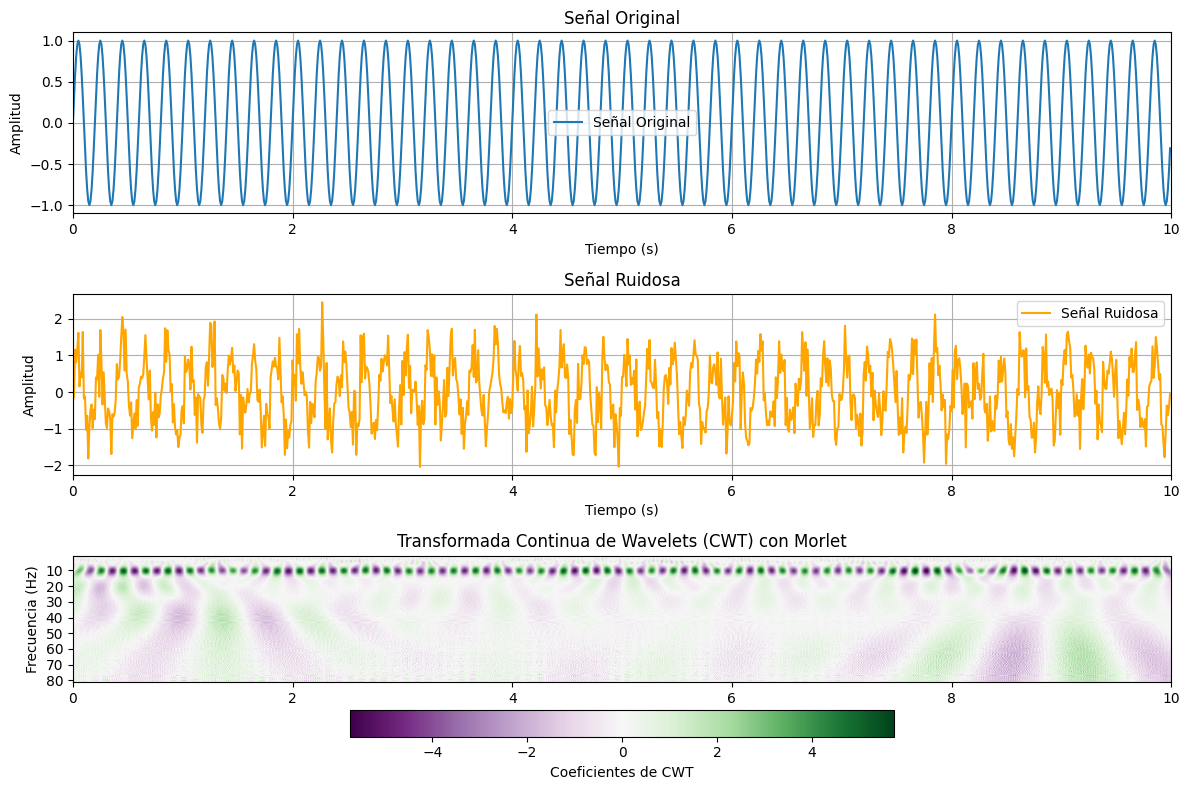

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pywt

# Parámetros de la señal
frecuencia = 5    # Frecuencia de la señal (Hz)
frecuencia_muestreo = 100  # Frecuencia de muestreo (Hz)
tiempo = np.arange(0, 10, 1 / frecuencia_muestreo)  # Eje temporal

# Generación de la señal (onda senoidal)
senal = np.sin(2 * np.pi * frecuencia * tiempo)

# Añadir ruido a la señal
ruido = np.random.normal(0, 0.5, senal.shape)
senal_ruidosa = senal + ruido

# Definir la escala para la CWT
scales = np.arange(1, 128)

# Realizar la Transformada Continua de Wavelets usando 'cmor' (Morlet complex wavelet)
coeficientes, _ = pywt.cwt(senal_ruidosa, scales, 'morl', sampling_period=1/frecuencia_muestreo)

# Convertir escalas a frecuencias usando pywt.scale2frequency
frecuencias = pywt.scale2frequency('morl', scales) * frecuencia_muestreo

# Crear la figura
plt.figure(figsize=(12, 8))

# Graficar la señal original
plt.subplot(3, 1, 1)
plt.plot(tiempo, senal, label='Señal Original')
plt.title('Señal Original')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.xlim(0,10)
plt.legend()
plt.grid(True)

# Graficar la señal ruidosa
plt.subplot(3, 1, 2)
plt.plot(tiempo, senal_ruidosa, label='Señal Ruidosa', color='orange')
plt.title('Señal Ruidosa')
plt.xlabel('Tiempo (s)')
plt.xlim(0,10)
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)

# Graficar la Transformada Continua de Wavelets
plt.subplot(3, 1, 3)
plt.imshow(coeficientes, extent=[0, 10, frecuencias[0], frecuencias[-1]], cmap='PRGn', aspect='auto',
           vmax=abs(coeficientes).max(), vmin=-abs(coeficientes).max())
plt.title('Transformada Continua de Wavelets (CWT) con Morlet')
plt.xlabel('Tiempo (s)')
plt.yticks(np.arange(80,0,-10))
plt.xlim(0,10)
plt.ylabel('Frecuencia (Hz)')
plt.colorbar(label='Coeficientes de CWT', orientation='horizontal')

# Ajustar el layout
plt.tight_layout()
plt.show()


In [114]:
import numpy as np
import pandas as pd

# Parámetros
frecuencia_muestreo = 100  # Frecuencia de muestreo (Hz)
scales = np.arange(1, 128)

# Conversión de escalas a frecuencias usando la relación inversa
#K = 1.0  # Factor de normalización para la wavelet 'cmor'
#frecuencias = frecuencia_muestreo / (scales * K)
frecuencias = pywt.scale2frequency('morl', scales) * frecuencia_muestreo
# Crear DataFrame con las escalas y las frecuencias correspondientes
scales = scales[::-1]
frecuencias = frecuencias[::-1]
data = {
    'Escala': scales,
    'Frecuencia (Hz)': frecuencias
}

df = pd.DataFrame(data)
df.tail(25)  # Mostrar las primeras 10 filas para ver la tabla resultante

,Escala,Frecuencia (Hz)
102,25,3.250000
103,24,3.385417
104,23,3.532609
105,22,3.693182
106,21,3.869048
107,20,4.062500
108,19,4.276316
109,18,4.513889
110,17,4.779412
111,16,5.078125
